<img src="https://i.imgur.com/zK75gSX.gif">

<center><h1>💰 Tesla (&Dogecoin, &Bitcoin) Prices, Elon Musk and Tweets 💰</h1></center>

Hexacodes:
- Tesla: #DF2E38
- Bitcoin: #f2a900
- Dogecoin: #cb9800
- Line chart: #95E1D3 or #4C4C6D

Source for inspiration: https://www.kaggle.com/code/andradaolteanu/bitcoin-dogecoin-on-rapids-and-elon-musk

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


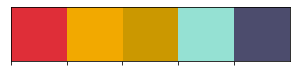

In [1]:
# Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import string
import regex as re
import spacy

from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk import word_tokenize
from nltk import FreqDist

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.base import TransformerMixin
from sklearn import set_config

from PIL import Image
from wordcloud import WordCloud
from textwrap import wrap

# Color palette
my_colors = ["#DF2E38", "#f2a900", "#cb9800", "#95E1D3", "#4C4C6D"]
sns.palplot(sns.color_palette(my_colors))

# Set Style
sns.set_style("white")
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

class color:
    BOLD = '\033[1m' + '\033[93m'
    END = '\033[0m'

In [2]:
stocks = pd.read_csv('../data/stocks_data.csv')
stocks.head()
stocks.rename(columns={"Date": "date"}, inplace=True)
stocks.head()

tesla_stocks = stocks[['date', 'Close_Tsla', 'Volume_Tsla', 'simple_return_Tsla', 'log_return_Tsla', 
                      'Close_Tsla_Rescaled']]

bitcoin_stocks = stocks[['date', 'Close_Btc', 'Volume_Btc', 'simple_return_Btc', 'log_return_Btc', 
                      'Close_Btc_Rescaled']]

dogecoin_stocks = stocks[['date', 'Close_Doge', 'Volume_Doge', 'simple_return_Doge', 'log_return_Doge', 
                      'Close_Doge_Rescaled']]

tesla_stocks.dropna(inplace=True)
bitcoin_stocks.dropna(inplace=True)
dogecoin_stocks.dropna(inplace=True)

In [3]:
tweets_btc = pd.read_csv('../data/Elon Musk tweets about BTC.csv')
tweets_doge = pd.read_csv('../data/Elon Musk tweets about DOGE.csv')
tweets_tsla = pd.read_csv('../data/Elon Musk tweets about TSLA.csv')

In [4]:
columns_to_drop=['Unnamed: 0', 'created_at']
tweets_btc.drop(columns_to_drop, axis=1, inplace=True)
tweets_doge.drop(columns_to_drop, axis=1, inplace=True)
tweets_tsla.drop(columns_to_drop, axis=1, inplace=True)

# 🖇 Is there correlation between Dogecoin and Elon Musk's Tweets?

Is there?

<center><img src="https://cryptoslate.com/wp-content/themes/cryptoslate-2020/imgresize/timthumb.php?src=https://cryptoslate.com/wp-content/uploads/2019/04/elon-doge-social.jpg&w=1200&h=630&q=75" width=500></center>

In [5]:
tweets_doge['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23 entries, 0 to 22
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
21 non-null     object
dtypes: object(1)
memory usage: 312.0+ bytes


In [6]:
tweets_doge['date'] = pd.to_datetime(tweets_doge['date'])
tweets_doge['iso_date_timestamp'] = tweets_doge['date'].map(lambda x: x.isoformat())
timestamps = tweets_doge["date"]

In [7]:
dogecoin_stocks["date"].info()

<class 'pandas.core.series.Series'>
Int64Index: 1384 entries, 1857 to 3240
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
1384 non-null   object
dtypes: object(1)
memory usage: 21.6+ KB


In [8]:
dogecoin_stocks['date'] = pd.to_datetime(dogecoin_stocks['date'])
dogecoin_stocks = dogecoin_stocks.sort_values("date", ascending=False).head(800)
dogecoin_stocks['iso_date_timestamp'] = dogecoin_stocks['date'].map(lambda x: x.isoformat())

In [9]:
for k, tweet in enumerate(tweets_doge["tweet"]): print(color.BOLD + f"{k+1}." + color.END, tweet)

# Get intersection
x_values = dogecoin_stocks[dogecoin_stocks["date"].isin(timestamps)]["date"]
y_values = dogecoin_stocks[dogecoin_stocks["date"].isin(timestamps)]["Close_Doge"]

1. dogecoin value may vary
2. dogecoin rulz
3. dogecoin might be my fav cryptocurrency it’s pretty cool
4. dogecoin mode
5. dogecoin is the people’s crypto
6. bought some dogecoin for lil x so he can be a toddler hodler
7. if major dogecoin holders sell most of their coins it will get my full support too much concentration is the only real issue imo
8. 2022 dogecoin is dumb
9. origin of doge day afternoon the ancient romans sacrificed a dogecoin at the beginning of the doge days to appease the rage of sirius believing that the star was the cause of the hot sultry weather
10. spacex is going to put a literal dogecoin on the literal moon
11. someone suggested changing dogecoin fees based on phases of the moon which is pretty awesome haha
12. please note dogecoin has no formal organization amp no one reports to me so my ability to take action is limited
13. maybe if it sees a shiba inu the car renders a dogecoin …
14. in dogecoin
15. tuition is in dogecoin amp u get a discount if u have a

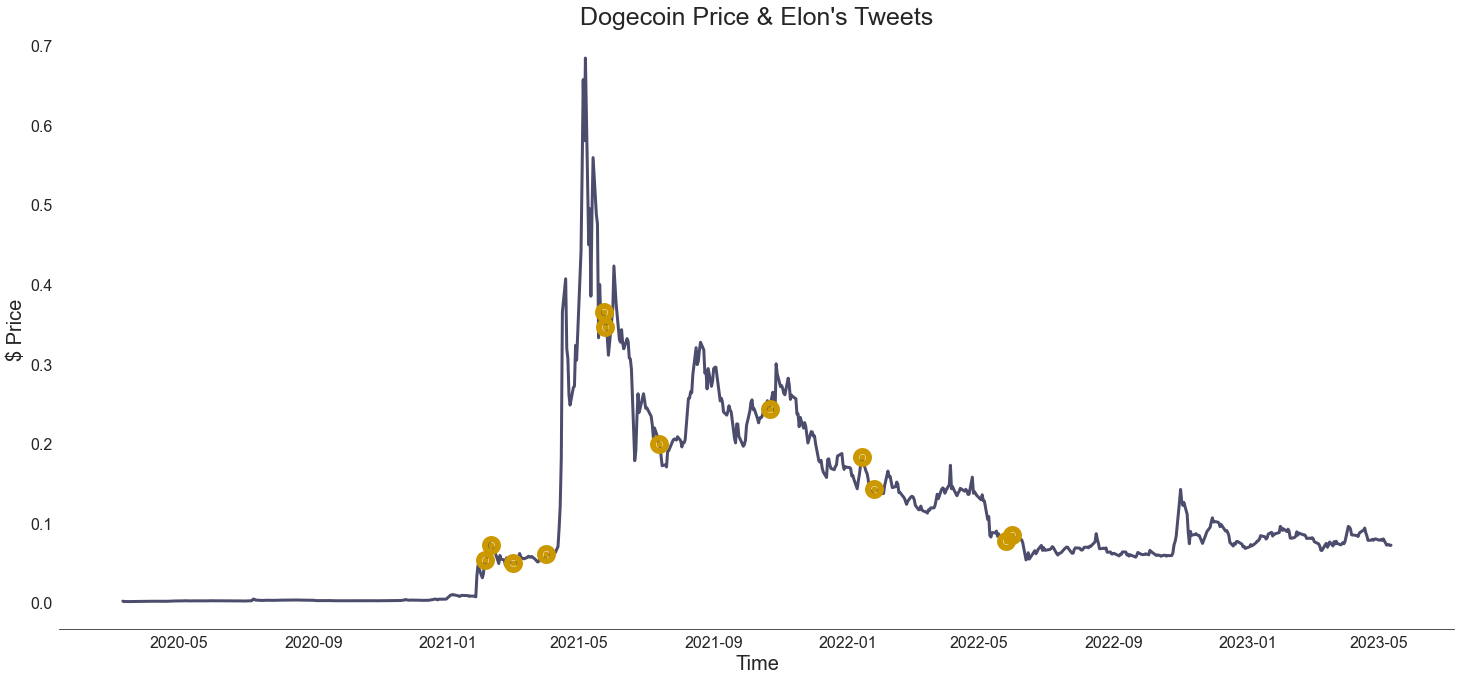

In [10]:
# Plot
plt.figure(figsize = (25, 11))
for x, y in zip(x_values, y_values):
    plt.scatter(x, y, color="#cb9800", lw=13, zorder=2)
plt.plot(dogecoin_stocks["date"], dogecoin_stocks["Close_Doge"], color=my_colors[4], lw=3, zorder=1)
plt.title("Dogecoin Price & Elon's Tweets", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20);

# 🖇 Is there correlation between Bitcoin and Elon Musk's Tweets?

Is there?

<center><img src="https://content.fortune.com/wp-content/uploads/2021/02/Elon-Musk-with-Bitcoin_web.jpg" width=500></center>

In [11]:
tweets_btc['date'].info()
tweets_btc['date'] = pd.to_datetime(tweets_btc['date'])
tweets_btc['iso_date_timestamp'] = tweets_btc['date'].map(lambda x: x.isoformat())
timestamps = tweets_btc["date"]

bitcoin_stocks["date"].info()
bitcoin_stocks['date'] = pd.to_datetime(bitcoin_stocks['date'])
bitcoin_stocks = bitcoin_stocks.sort_values("date", ascending=False).head(800)
bitcoin_stocks['iso_date_timestamp'] = bitcoin_stocks['date'].map(lambda x: x.isoformat())

<class 'pandas.core.series.Series'>
RangeIndex: 29 entries, 0 to 28
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
29 non-null     object
dtypes: object(1)
memory usage: 360.0+ bytes
<class 'pandas.core.series.Series'>
Int64Index: 2178 entries, 1063 to 3240
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
2178 non-null   object
dtypes: object(1)
memory usage: 34.0+ KB


In [12]:
for k, tweet in enumerate(tweets_btc["tweet"]): print(color.BOLD + f"{k+1}." + color.END, tweet)

# Get intersection
x_values = bitcoin_stocks[bitcoin_stocks["date"].isin(timestamps)]["date"]
y_values = bitcoin_stocks[bitcoin_stocks["date"].isin(timestamps)]["Close_Btc"]

1. wanna buy some bitcoin
2. bitcoin is not my safe word
3. how much for some anime bitcoin
4. pretty much although massive currency issuance by govt central banks is making bitcoin internet money look solid by comparison
5. i still only own 025 bitcoins btw
6. toss a bitcoin to ur witcher
7. bitcoin is almost as bs as fiat money
8. bitcoin is my safe word
9. to be clear i am not an investor i am an engineer i don’t even own any publicly traded stock besides tesla however when fiat currency has negative real interest only a fool wouldn’t look elsewhere bitcoin is almost as bs as fiat money the key word is “almost”
10. tesla’s action is not directly reflective of my opinion having some bitcoin which is simply a less dumb form of liquidity than cash is adventurous enough for an sampp500 company
11. btc bitcoin is an anagram of tbcthe boring company what a coincidence
12. pay by bitcoin capability available outside us later this year
13. you can now buy a tesla with bitcoin
14. tesla is u

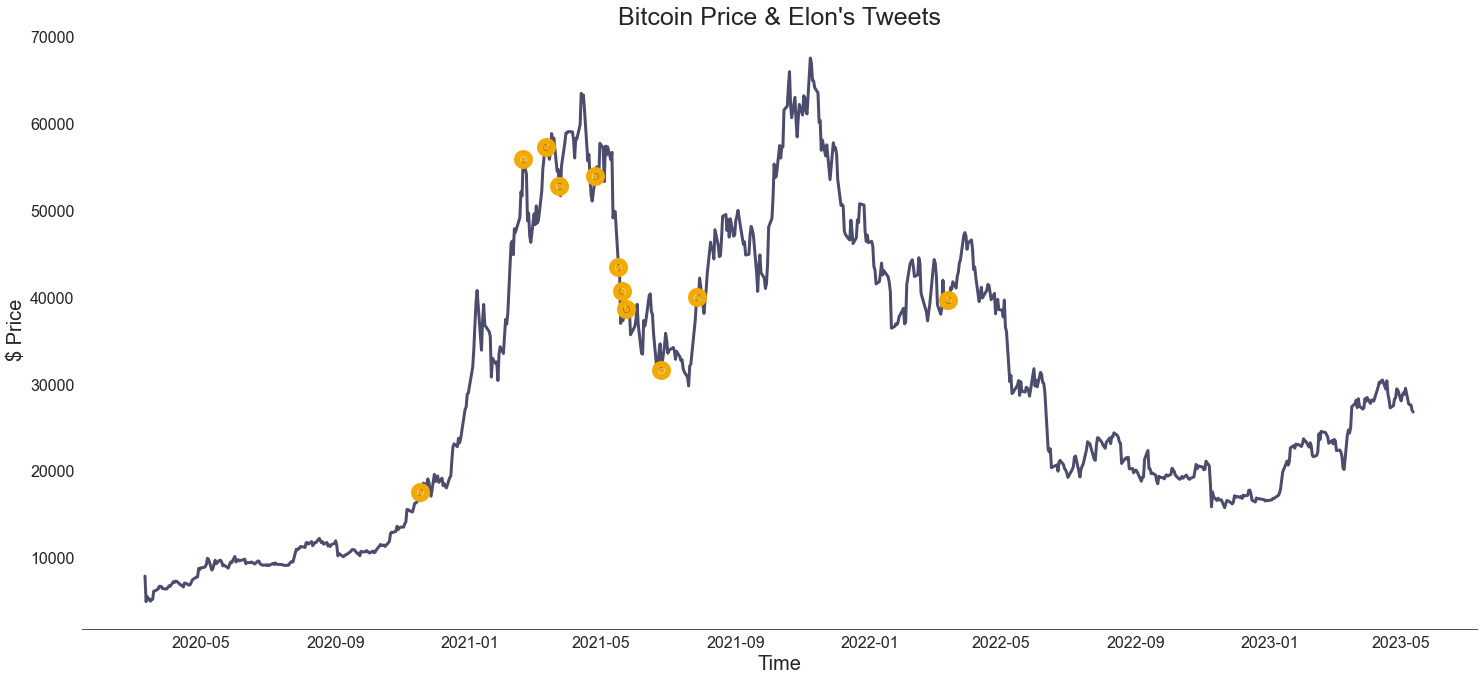

In [13]:
# Plot
plt.figure(figsize = (25, 11))
for x, y in zip(x_values, y_values):
    plt.scatter(x, y, color="#f2a900", lw=13, zorder=2)
plt.plot(bitcoin_stocks["date"], bitcoin_stocks["Close_Btc"], color=my_colors[4], lw=3, zorder=1)
plt.title("Bitcoin Price & Elon's Tweets", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20);

# 🖇 Is there correlation between Tesla and Elon Musk's Tweets?

Is there?

<center><img src="https://cloudfront-us-east-2.images.arcpublishing.com/reuters/2KZF422BJRLJRHC7OZXEK24LOU.jpg" width=500></center>

In [14]:
tweets_tsla['date'].info()
tweets_tsla['date'] = pd.to_datetime(tweets_tsla['date'])
tweets_tsla['iso_date_timestamp'] = tweets_tsla['date'].map(lambda x: x.isoformat())
timestamps = tweets_tsla["date"]

tesla_stocks["date"].info()
tesla_stocks['date'] = pd.to_datetime(tesla_stocks['date'])
tesla_stocks = tesla_stocks.sort_values("date", ascending=False).head(800)
tesla_stocks['iso_date_timestamp'] = tesla_stocks['date'].map(lambda x: x.isoformat())

<class 'pandas.core.series.Series'>
RangeIndex: 1392 entries, 0 to 1391
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
1271 non-null   object
dtypes: object(1)
memory usage: 11.0+ KB
<class 'pandas.core.series.Series'>
Int64Index: 3240 entries, 1 to 3240
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
3240 non-null   object
dtypes: object(1)
memory usage: 50.6+ KB


In [15]:
for k, tweet in enumerate(tweets_tsla["tweet"]): print(color.BOLD + f"{k+1}." + color.END, tweet)

# Get intersection
x_values = tesla_stocks[tesla_stocks["date"].isin(timestamps)]["date"]
y_values = tesla_stocks[tesla_stocks["date"].isin(timestamps)]["Close_Tsla"]


1. hacked my tesla charge connector on a small island in the rain last night
2. the exec conf room at tesla used to be called denali but i decided to move a few letters around seemed more apt 
3. a tesla roadster just passed the 100000 mile mark for the first time and still has over 200 miles of range
4. will communicate better in the future too many people want us to fail and are willing to twist any bit of news against tesla
5. thats not just paranoia a healthy trait at times tesla really is under massive attack by short sellers
6. tesla model x video
7. tesla model x is 3rd most searched term on google right after purple squirrel damn you squirrel
8. the president of serbia came by our booth at the geneva motor show and talked about nikola tesla
9. wow a tesla owner in europe just passed 200000 km while racing his roadster
10. meant to say prizes for first 10 who do 400 miles in tesla wo recharging not nonstop which would require diapers 
11. major tesla milestone all crash testing 

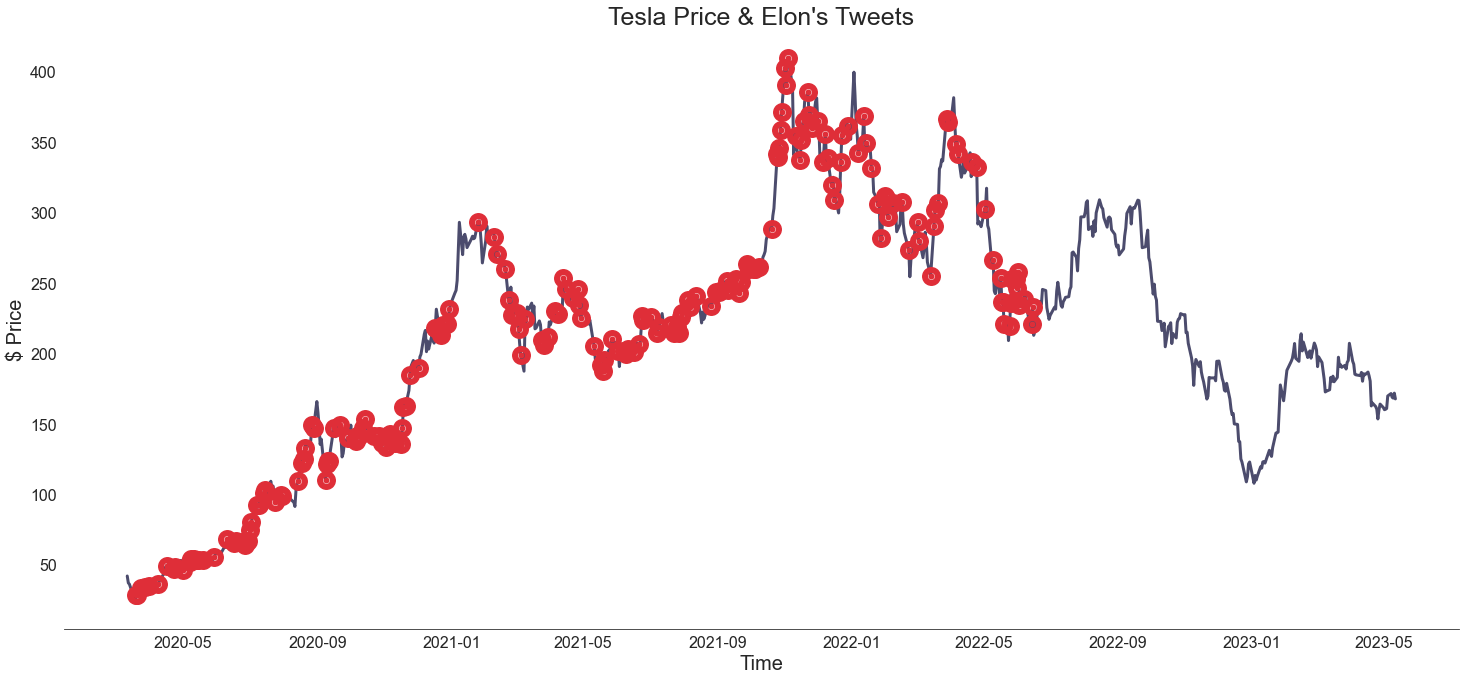

In [16]:
# Plot
plt.figure(figsize = (25, 11))
for x, y in zip(x_values, y_values):
    plt.scatter(x, y, color="#DF2E38", lw=13, zorder=2)
plt.plot(tesla_stocks["date"], tesla_stocks["Close_Tsla"], color=my_colors[4], lw=3, zorder=1)
plt.title("Tesla Price & Elon's Tweets", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20);